<a href="https://colab.research.google.com/github/Bhavin52/practice/blob/main/sewer_network_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

In [29]:
data = pd.read_csv("/content/sewer_network.csv")
data.head()

Pipe \nLabel U/S\nNode D/S\nNode  Ground level (U/s) (m)  \
0      P-00001   M-00001   M-13952                  198.37   
1      P-00002   M-00002   M-00003                  199.72   
2      P-00003   M-00003   M-00004                  199.67   
3      P-00004   M-00004   M-00005                  199.61   
4      P-00005   M-00005   M-00006                  199.56   

   Ground level (D/s) (m)  Invert (U/S) (m)  Invert (D/s) (m)  Length (m)  \
0                  198.37            197.17            196.98        18.8   
1                  199.67            198.52            198.32        18.5   
2                  199.61            198.32            198.22        16.2   
3                  199.56            198.22            198.14        16.2   
4                  199.46            198.14            198.05        22.1   

   Diameter (mm) Slope  ...  Capacity \n(Full Flow) (L/s)  \
0            200    95  ...                         43.75   
1            200    90  ...                         44.94   
2            200   160  ...                         33.71   
3            200   220  ...                         28.75   
4            200   250  ...                         26.97   

  Velocity at Full Flow (m/s)  Drop Provided (m)  Pipe material  Manning's n  \
0                         1.4                NaN     DWC/ PE100         0.01   
1                         1.4                NaN     DWC/ PE100         0.01   
2                         1.1                NaN     DWC/ PE100         0.01   
3                         0.9                NaN     DWC/ PE100         0.01   
4                         0.9                NaN     DWC/ PE100         0.01   

   Infiltration (Cumulative) (lps)  Depth of Sewer in U/S (m)  \
0                             0.03                       1.20   
1                             0.05                       1.20   
2                             0.08                       1.35   
3                             0.10                       1.39   
4                             0.12                       1.42   

   Depth of Sewer in D/S (m)  Avg Depth of Sewer (m) Remark   
0                       1.39                    1.30     NaN  
1                       1.35                    1.27     NaN  
2                       1.39                    1.37     NaN  
3                       1.42                    1.41     NaN  
4                       1.41                    1.42     NaN  

[5 rows x 26 columns]

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14080 entries, 0 to 14079
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Pipe 
Label                      14080 non-null  object 
 1   U/S
Node                         14080 non-null  object 
 2   D/S
Node                         14080 non-null  object 
 3   Ground level (U/s) (m)           14080 non-null  float64
 4   Ground level (D/s) (m)           14080 non-null  float64
 5   Invert (U/S) (m)                 14080 non-null  float64
 6   Invert (D/s) (m)                 14080 non-null  float64
 7   Length (m)                       14080 non-null  float64
 8   Diameter (mm)                    14080 non-null  int64  
 9   Slope                            14080 non-null  object 
 10  Ulimate Population Incremental   14080 non-null  int64  
 11  Ultimate Population cumulative   14080 non-null  object 
 12  Ulimate Peak Flow 

In [33]:
data['Ultimate Population cumulative'] = pd.to_numeric(data['Ultimate Population cumulative'],errors='coerce')
data['Slope'] = pd.to_numeric(data['Slope'],errors='coerce')
data['Pipe material'] = data['Pipe material'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14080 entries, 0 to 14079
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Pipe 
Label                      14080 non-null  object  
 1   U/S
Node                         14080 non-null  object  
 2   D/S
Node                         14080 non-null  object  
 3   Ground level (U/s) (m)           14080 non-null  float64 
 4   Ground level (D/s) (m)           14080 non-null  float64 
 5   Invert (U/S) (m)                 14080 non-null  float64 
 6   Invert (D/s) (m)                 14080 non-null  float64 
 7   Length (m)                       14080 non-null  float64 
 8   Diameter (mm)                    14080 non-null  int64   
 9   Slope                            13967 non-null  float64 
 10  Ulimate Population Incremental   14080 non-null  int64   
 11  Ultimate Population cumulative   13996 non-null  float64 
 12  Ulim

In [34]:
data[data.duplicated()].shape

(3, 26)

In [35]:
data[data.duplicated()]

Pipe \nLabel U/S\nNode D/S\nNode  Ground level (U/s) (m)  \
14077      P-00005   M-00005   M-00006                  199.56   
14078      P-00171   M-00171   M-00172                  204.51   
14079      P-09341   M-09341   M-09342                  201.68   

       Ground level (D/s) (m)  Invert (U/S) (m)  Invert (D/s) (m)  Length (m)  \
14077                  199.46            198.14            198.05        22.1   
14078                  204.67            203.31            203.20        27.4   
14079                  200.08            199.27            198.88        23.8   

       Diameter (mm)  Slope  ...  Capacity \n(Full Flow) (L/s)  \
14077            200  250.0  ...                         26.97   
14078            200  250.0  ...                         26.97   
14079            200   60.0  ...                         55.05   

       Velocity at Full Flow (m/s)  Drop Provided (m)  Pipe material  \
14077                          0.9                NaN     DWC/ PE100   
14078                          0.9                NaN     DWC/ PE100   
14079                          1.7                NaN     DWC/ PE100   

       Manning's n  Infiltration (Cumulative) (lps)  \
14077         0.01                             0.12   
14078         0.01                             0.20   
14079         0.01                             0.30   

       Depth of Sewer in U/S (m)  Depth of Sewer in D/S (m)  \
14077                       1.42                       1.41   
14078                       1.20                       1.47   
14079                       2.41                       1.20   

       Avg Depth of Sewer (m) Remark   
14077                    1.42     NaN  
14078                    1.33     NaN  
14079                    1.81     NaN  

[3 rows x 26 columns]

In [36]:
data1 = data.drop_duplicates()

In [37]:
data1.shape

(14077, 26)

In [38]:
data = data1.copy()

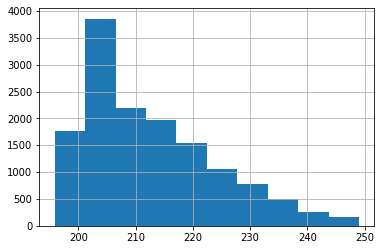

In [39]:
data['Ground level (D/s) (m)'].hist()

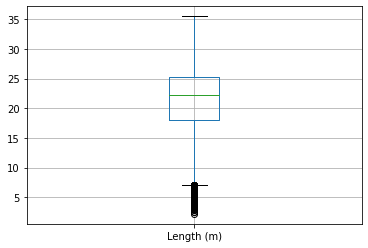

In [40]:
data.boxplot(column=['Length (m)'])

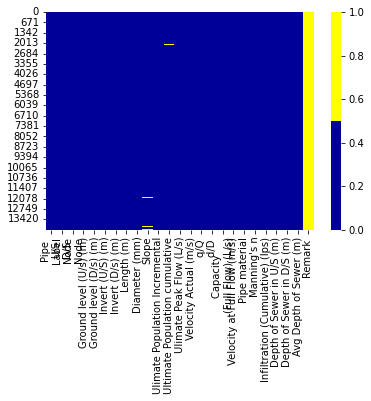

In [44]:
import seaborn as sns
cols = data.columns
colours = ['#000099', '#ffff00']
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))


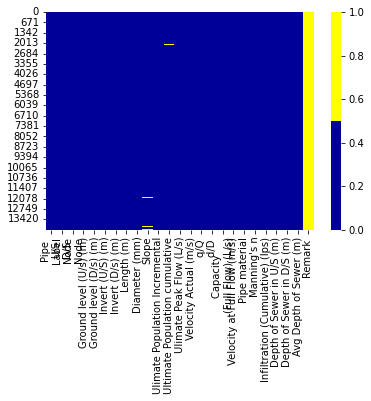

In [48]:
import seaborn as sns
cols = data.columns
colours = ['#000099', '#ffff00']
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))


In [21]:
mean1 = data1['Ultimate Population cumulative'].mean()
mean2 = data1['Slope'].mean()
data1['Ultimate Population cumulative'] = data1['Ultimate Population cumulative'].fillna(mean1)
data1['Slope'] = data1['Slope'].fillna(mean2)
data = data1.copy()
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14077 entries, 0 to 14076
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Pipe 
Label                      14077 non-null  object  
 1   U/S
Node                         14077 non-null  object  
 2   D/S
Node                         14077 non-null  object  
 3   Ground level (U/s) (m)           14077 non-null  float64 
 4   Ground level (D/s) (m)           14077 non-null  float64 
 5   Invert (U/S) (m)                 14077 non-null  float64 
 6   Invert (D/s) (m)                 14077 non-null  float64 
 7   Length (m)                       14077 non-null  float64 
 8   Diameter (mm)                    14077 non-null  int64   
 9   Slope                            14077 non-null  float64 
 10  Ulimate Population Incremental   14077 non-null  int64   
 11  Ultimate Population cumulative   14077 non-null  float64 
 12  Ulim

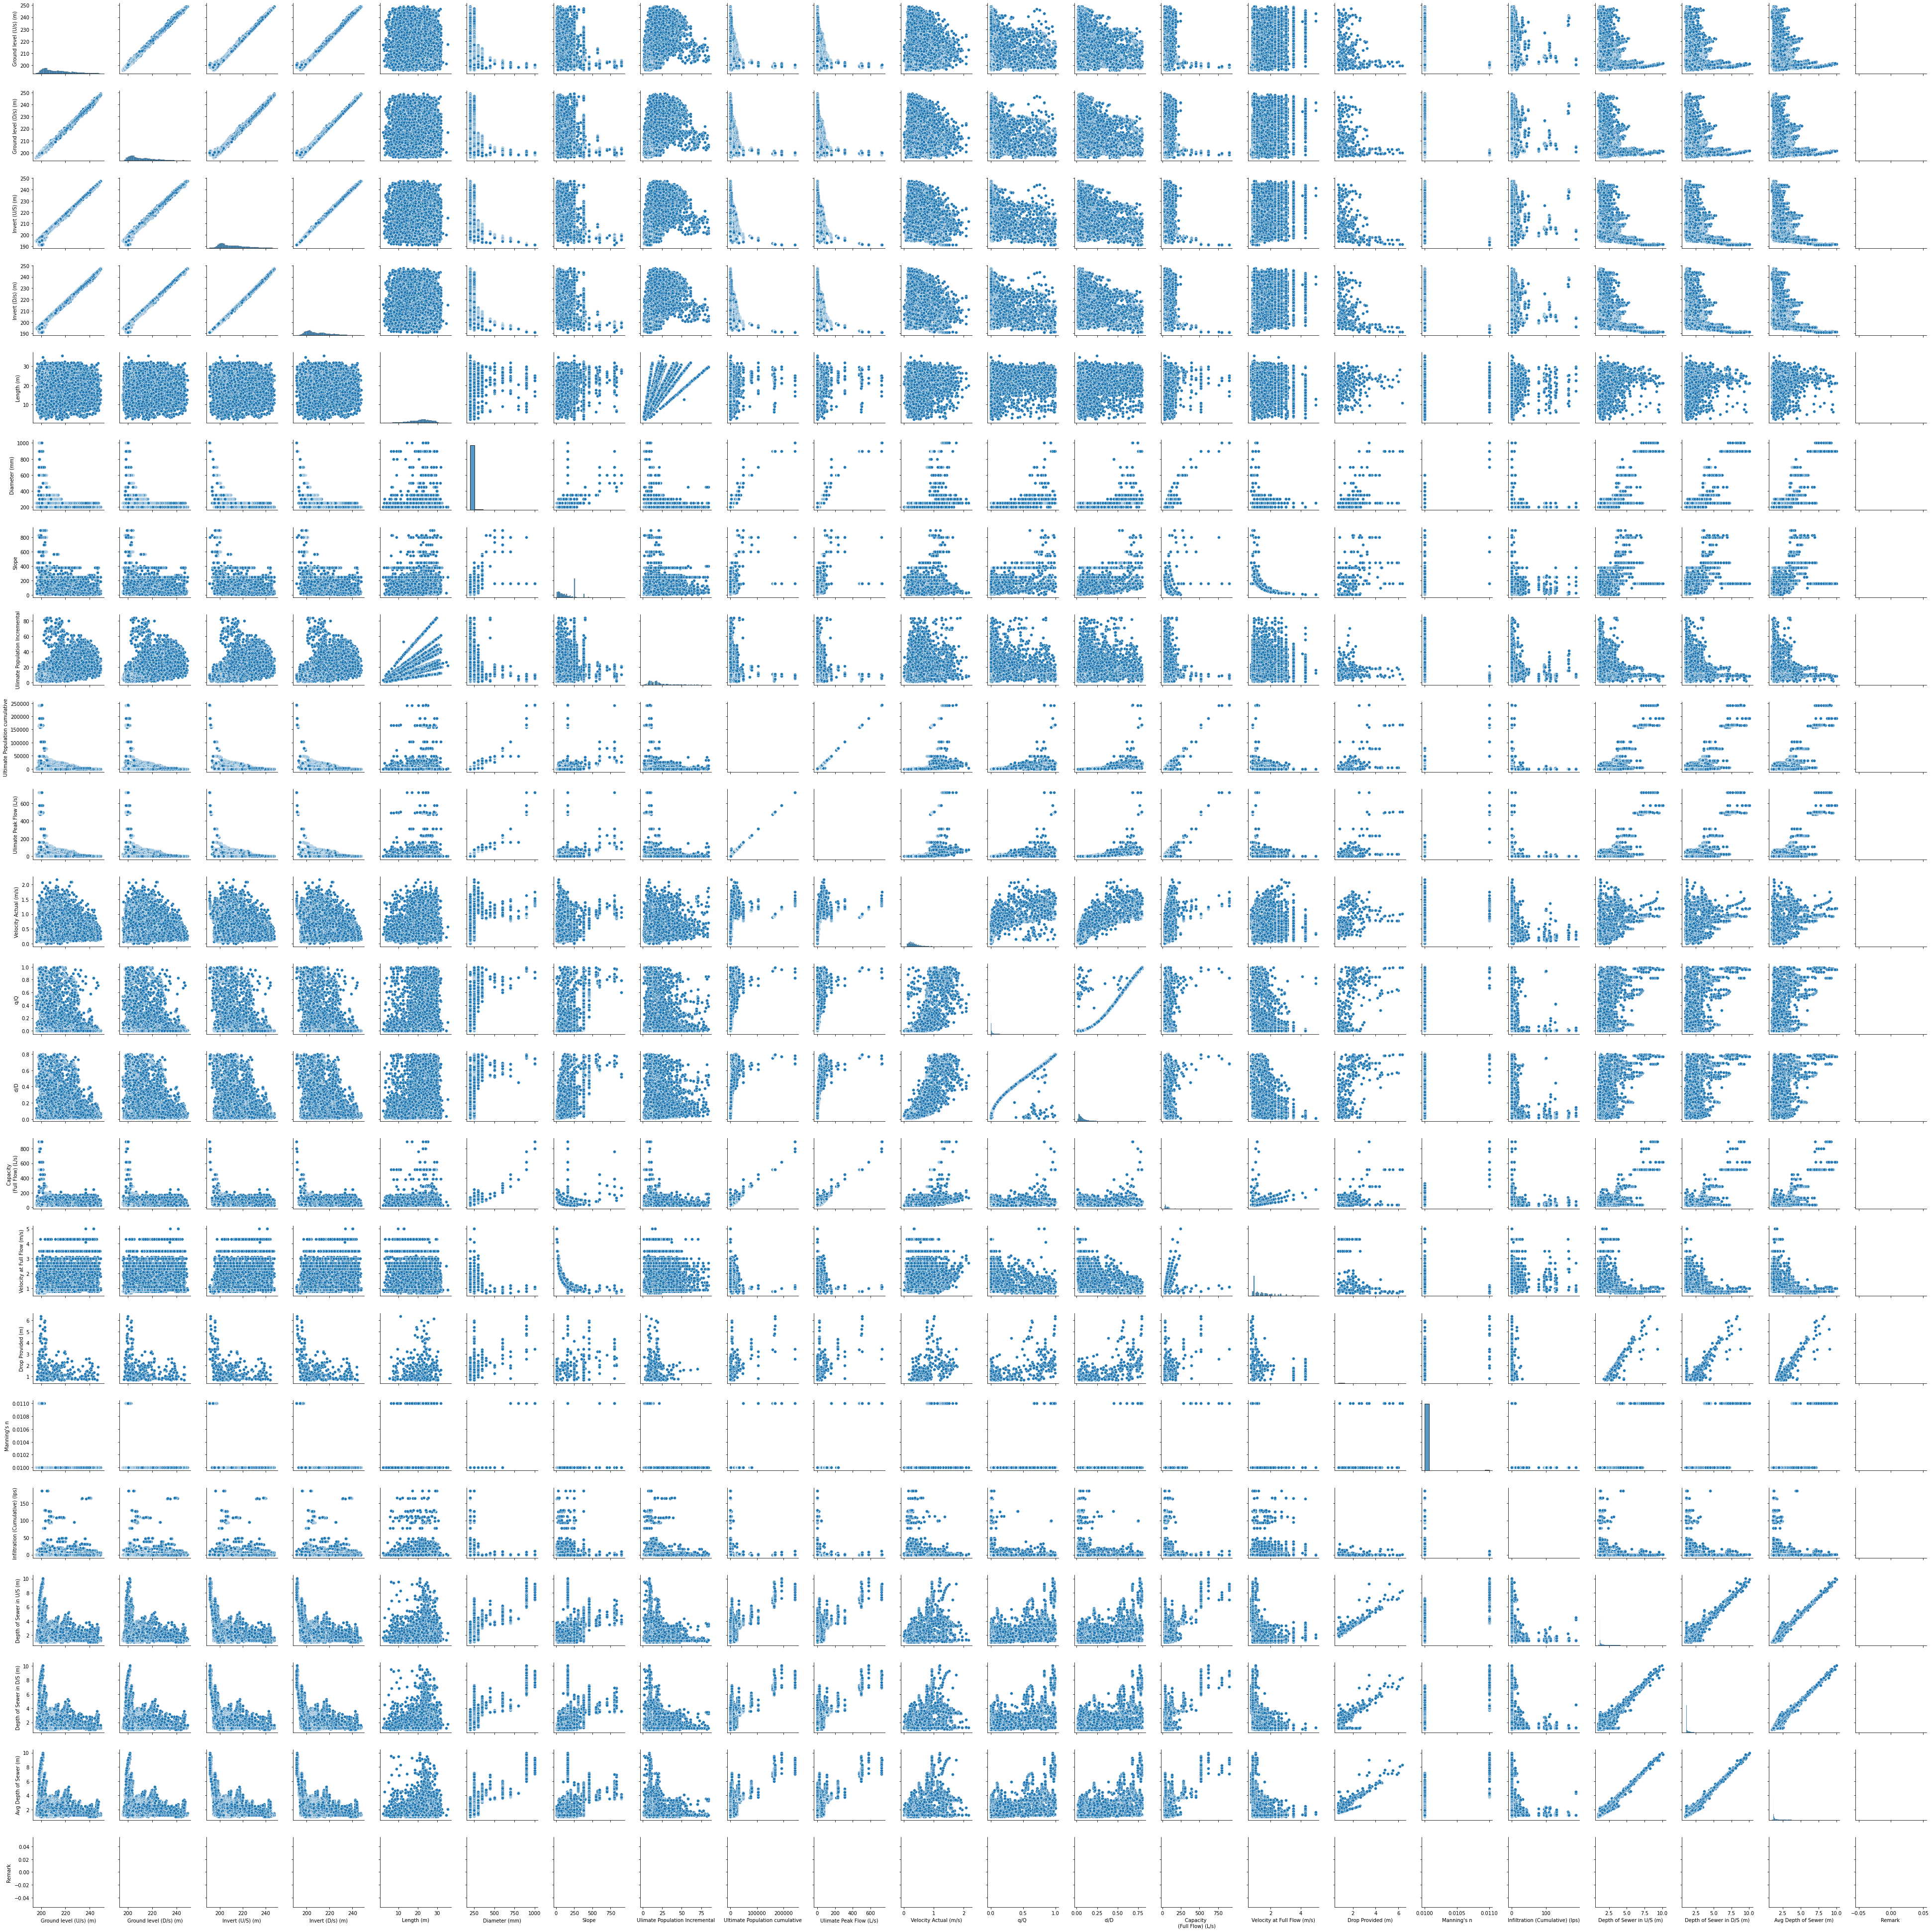

In [22]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data)

In [23]:
data.corr()

Ground level (U/s) (m)  \
Ground level (U/s) (m)                         1.000000   
Ground level (D/s) (m)                         0.999310   
Invert (U/S) (m)                               0.997509   
Invert (D/s) (m)                               0.997414   
Length (m)                                    -0.054560   
Diameter (mm)                                 -0.151328   
Slope                                         -0.272291   
Ulimate Population Incremental                 0.437564   
Ultimate Population cumulative                -0.132831   
Ulimate Peak Flow (L/s)                       -0.134733   
Velocity Actual (m/s)                          0.072973   
q/Q                                           -0.112790   
d/D                                           -0.099725   
Capacity \n(Full Flow) (L/s)                   0.039582   
Velocity at Full Flow (m/s)                    0.367525   
Drop Provided (m)                             -0.270887   
Manning's n                                   -0.105633   
Infiltration (Cumulative) (lps)               -0.012955   
Depth of Sewer in U/S (m)                     -0.181674   
Depth of Sewer in D/S (m)                     -0.227028   
Avg Depth of Sewer (m)                        -0.207003   
Remark                                              NaN   

                                 Ground level (D/s) (m)  Invert (U/S) (m)  \
Ground level (U/s) (m)                         0.999310          0.997509   
Ground level (D/s) (m)                         1.000000          0.996859   
Invert (U/S) (m)                               0.996859          1.000000   
Invert (D/s) (m)                               0.997493          0.999691   
Length (m)                                    -0.057115         -0.060051   
Diameter (mm)                                 -0.150200         -0.204046   
Slope                                         -0.256528         -0.299971   
Ulimate Population Incremental                 0.434570          0.436196   
Ultimate Population cumulative                -0.131746         -0.182884   
Ulimate Peak Flow (L/s)                       -0.133559         -0.185816   
Velocity Actual (m/s)                          0.069711          0.037155   
q/Q                                           -0.109799         -0.159168   
d/D                                           -0.095374         -0.145816   
Capacity \n(Full Flow) (L/s)                   0.029318         -0.002732   
Velocity at Full Flow (m/s)                    0.342459          0.376930   
Drop Provided (m)                             -0.276640         -0.351573   
Manning's n                                   -0.104955         -0.144415   
Infiltration (Cumulative) (lps)               -0.012816         -0.012237   
Depth of Sewer in U/S (m)                     -0.182080         -0.250586   
Depth of Sewer in D/S (m)                     -0.218774         -0.291599   
Avg Depth of Sewer (m)                        -0.203022         -0.274605   
Remark                                              NaN               NaN   

                                 Invert (D/s) (m)  Length (m)  Diameter (mm)  \
Ground level (U/s) (m)                   0.997414   -0.054560      -0.151328   
Ground level (D/s) (m)                   0.997493   -0.057115      -0.150200   
Invert (U/S) (m)                         0.999691   -0.060051      -0.204046   
Invert (D/s) (m)                         1.000000   -0.062423      -0.202295   
Length (m)                              -0.062423    1.000000       0.067486   
Diameter (mm)                           -0.202295    0.067486       1.000000   
Slope                                   -0.285764    0.138013       0.289228   
Ulimate Population Incremental           0.433652    0.364861      -0.065168   
Ultimate Population cumulative          -0.181540    0.052516       0.948315   
Ulimate Peak Flow (L/s)                 -0.184339    0.056599       0.953974   
Velocity Actual (m/s)  

In [24]:
data=pd.get_dummies(data,columns=['Pipe material'])